# <a name="0">Hierarchical Clustering</a>

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
4. <a href="#5">Training datasets</a>
5. <a href="#6">Improvement ideas</a>



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/fernandol/countries-of-the-world
then import it in python.

In [ ]:
#read the data

data_path = 'archive/countries of the world.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (227, 20)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [ ]:
# Let's see the data types and non-null values for each column
df.info()
#missing values in 'Net migration','GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)',
#'Climate','Birthrate','Deathrate','Agriculture','Industry','Service'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

In [ ]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

Country                               0.00
Region                                0.00
Population                            0.00
Area (sq. mi.)                        0.00
Pop. Density (per sq. mi.)            0.00
Coastline (coast/area ratio)          0.00
Net migration                         1.32
Infant mortality (per 1000 births)    1.32
GDP ($ per capita)                    0.44
Literacy (%)                          7.93
Phones (per 1000)                     1.76
Arable (%)                            0.88
Crops (%)                             0.88
Other (%)                             0.88
Climate                               9.69
Birthrate                             1.32
Deathrate                             1.76
Agriculture                           6.61
Industry                              7.05
Service                               6.61
dtype: float64

In [ ]:
# This will print basic statistics for numerical columns
df.describe()

,Population,Area (sq. mi.),GDP ($ per capita)
count,2.270000e+02,2.270000e+02,226.000000
mean,2.874028e+07,5.982270e+05,9689.823009
std,1.178913e+08,1.790282e+06,10049.138513
min,7.026000e+03,2.000000e+00,500.000000
25%,4.376240e+05,4.647500e+03,1900.000000
50%,4.786994e+06,8.660000e+04,5550.000000
75%,1.749777e+07,4.418110e+05,15700.000000
max,1.313974e+09,1.707520e+07,55100.000000


In [ ]:
dups = df.duplicated()
print(dups.any())

False


In [ ]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1- Missing values        <br>
2- Incorrect data format (numbers are read as objects) <br>      
3- Different scales        <br>

In [ ]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

In [ ]:
#test 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

**Numbers format issue**

In [ ]:
#solution 
#change number data fromats to floats
cols = ['Pop. Density (per sq. mi.)','Coastline (coast/area ratio)','Net migration','Infant mortality (per 1000 births)','Literacy (%)','Phones (per 1000)','Phones (per 1000)','Arable (%)','Crops (%)','Other (%)','Climate','Birthrate','Deathrate','Agriculture','Industry','Service']
for col in cols:
    df_copy[col] = df_copy[col].astype(str).str.replace(',', '').astype(float)

#### Missing values issue

In [ ]:
#solution 
#missing values
#df_copy = df_copy.dropna(axis=0)
from sklearn.impute import SimpleImputer
df_copy = df_copy.drop(columns=['Country','Region'])
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
df_copy = imp.fit_transform(df_copy)

In [ ]:
#test 
print(df_copy.shape)

(227, 18)


### Third Issue

#### Different scales solved below with normalizing

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

In [ ]:
# Encode categorical variables
#df_copy = pd.get_dummies(df_copy,['Country','Region'])
#print(df_copy.head())

In [ ]:
from sklearn import preprocessing

In [ ]:
df_copy = preprocessing.Normalizer().fit_transform(df_copy)
print(df_copy)

[[9.99782552e-01 2.08442304e-02 1.54520936e-05 ... 1.22329074e-06
  7.72604680e-07 1.22329074e-06]
 [9.99964241e-01 8.02617002e-03 3.47871429e-04 ... 6.47722083e-05
  5.24878240e-05 1.61651330e-04]
 [9.97394547e-01 7.21387162e-02 4.17977732e-06 ... 3.05911239e-06
  1.81729449e-07 9.02589595e-06]
 ...
 [9.99697264e-01 2.45994379e-02 1.89165517e-05 ... 6.28998639e-06
  2.19916561e-05 1.83108493e-05]
 [9.97865775e-01 6.52936098e-02 1.32736334e-05 ... 1.90862702e-06
  2.51591743e-06 4.24235733e-05]
 [9.99490503e-01 3.19022000e-02 2.55655400e-05 ... 1.46205484e-05
  1.98480071e-05 4.72921650e-05]]


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance 
    - Manhattan Distance 
    - Mahalanobis distance 
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

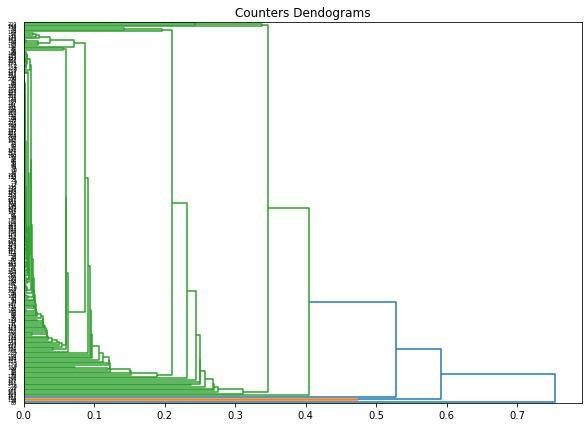

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=df_copy , method='single',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function

In [ ]:
#training
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
clustering = AgglomerativeClustering().fit(df_copy)
print(silhouette_score(df_copy,clustering.labels_))

0.7687248428278648


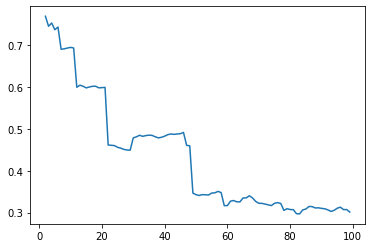

In [ ]:
import matplotlib.pyplot as plt
n_clusters = list(range(2,100))
scores = []
for n in n_clusters:
    model = AgglomerativeClustering(n_clusters=n).fit(df_copy)
    scores.append(silhouette_score(df_copy,model.labels_))
plt.plot(n_clusters, scores)

In [ ]:
bestmodel = AgglomerativeClustering(n_clusters=50).fit(df_copy)
print(silhouette_score(df_copy,bestmodel.labels_))

0.3427245952694171


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans().fit(df_copy)
print(silhouette_score(df_copy,kmeans.labels_))

0.7508756093203476


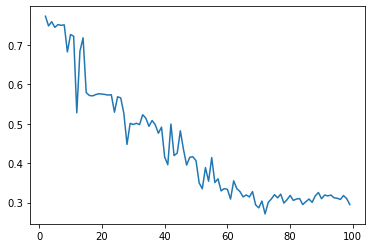

In [ ]:
import matplotlib.pyplot as plt
n_clusters = list(range(2,100))
scores = []
for n in n_clusters:
    model = KMeans(n_clusters=n).fit(df_copy)
    scores.append(silhouette_score(df_copy,model.labels_))
plt.plot(n_clusters, scores)

In [ ]:
bestmodel2 = KMeans(n_clusters=50).fit(df_copy)
print(silhouette_score(df_copy,bestmodel2.labels_))

0.33457081256543597


## 6. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method 

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
res = pca.fit_transform(df_copy)
print(res.shape)

(227, 7)


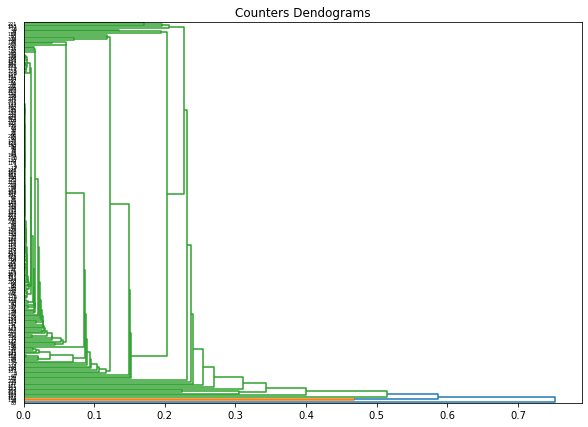

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=res , method='single',metric='euclidean'),orientation='right') #fill y with your dataframe
                                                                                      #and method with linkage criteria
                                                                                      #and metric with distance function